In [87]:

import os
import sys

# 获取当前工作目录
cur_dir = os.getcwd()
# 假设你想添加的路径是当前目录的上一级目录
root = os.path.abspath(os.path.join(cur_dir, '..'))

# 将此路径添加到 sys.path 中，以便能够导入那里的模块
if root not in sys.path:
    sys.path.append(root)

    
from get_data.ak_data_fetch import FinancialDataFetcher
import datetime
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt
import backtrader as bt  # 升级到最新版，pip install matplotlib==3.2.2

import numpy as np
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [126]:


stock_index = '159607'

s_date = (datetime.datetime.now() - datetime.timedelta(days=100)).strftime('%Y%m%d')
e_date = datetime.datetime.now().strftime('%Y%m%d')

# 创建数据获取器
fetcher = FinancialDataFetcher()
# 获取股票数据
fetcher.fetch_fund_info(symbol=stock_index, start_date=s_date, end_date=e_date)
fetcher.fund_rename()
    
    
df=fetcher.fund_info
print(df)

# 计算开盘幅度，即今天的开盘价与昨天的收盘价之间的变化
df['OpenAmplitude'] = (df['open'] - df['close'].shift(1)) / df['close'].shift(1) * 100
# 计算开盘幅度，即今天的开盘价与昨天的收盘价之间的变化
df['CloseAmplitude'] = (df['close'] - df['close'].shift(1)) / df['close'].shift(1) * 100


          date   open  close   high    low      vol      Turnover  Amplitude  \
0   2024-09-03  0.744  0.743  0.750  0.739  3241574  2.413639e+08       1.49   
1   2024-09-04  0.739  0.741  0.747  0.736  2640070  1.957509e+08       1.48   
2   2024-09-05  0.740  0.737  0.745  0.735  3774185  2.792840e+08       1.35   
3   2024-09-06  0.738  0.732  0.742  0.732  1089405  8.034558e+07       1.36   
4   2024-09-09  0.730  0.730  0.736  0.728  2223149  1.626267e+08       1.09   
..         ...    ...    ...    ...    ...      ...           ...        ...   
61  2024-12-06  0.893  0.907  0.909  0.889  4321159  3.888572e+08       2.25   
62  2024-12-09  0.902  0.906  0.913  0.901  2776835  2.513695e+08       1.32   
63  2024-12-10  0.974  0.941  0.982  0.941  7231633  6.941177e+08       4.53   
64  2024-12-11  0.944  0.929  0.949  0.926  3272085  3.071229e+08       2.44   
65  2024-12-12  0.930  0.946  0.949  0.925  2452069  2.290894e+08       2.58   

    ChangePercent  ChangeAmount  Turnov

In [74]:

# 计算开盘幅度，即今天的开盘价与昨天的收盘价之间的变化
df['OpenAmplitude'] = (df['open'] - df['close'].shift(1)) / df['close'].shift(1) * 100
# 计算开盘幅度，即今天的开盘价与昨天的收盘价之间的变化
df['CloseAmplitude'] = (df['close'] - df['close'].shift(1)) / df['close'].shift(1) * 100


# # 打印所有大于0的开盘幅度
# print("**********************大于0的开盘幅度*************************")
# print(df[df['OpenAmplitude'] > 0])
# # 确定开盘幅度大于0的天数
# positive_open_amplitude_count = df[df['OpenAmplitude'] > 0].shape[0]
# # 计算总天数（排除第一天，因为它没有前一天的收盘价）
# total_days = df.shape[0] - 1
# # 计算占比
# positive_open_amplitude_ratio = positive_open_amplitude_count / total_days
df

,date,open,close,high,low,vol,Turnover,Amplitude,ChangePercent,ChangeAmount,TurnoverRate,OpenAmplitude,CloseAmplitude
0,2024-09-03,0.744,0.743,0.750,0.739,3241574,2.413639e+08,1.49,0.41,0.003,15.69,NaN,NaN
1,2024-09-04,0.739,0.741,0.747,0.736,2640070,1.957509e+08,1.48,-0.27,-0.002,12.78,-0.538358,-0.269179
2,2024-09-05,0.740,0.737,0.745,0.735,3774185,2.792840e+08,1.35,-0.54,-0.004,18.27,-0.134953,-0.539811
3,2024-09-06,0.738,0.732,0.742,0.732,1089405,8.034558e+07,1.36,-0.68,-0.005,5.27,0.135685,-0.678426
4,2024-09-09,0.730,0.730,0.736,0.728,2223149,1.626267e+08,1.09,-0.27,-0.002,10.76,-0.273224,-0.273224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2024-12-06,0.893,0.907,0.909,0.889,4321159,3.888572e+08,2.25,2.02,0.018,20.92,0.449944,2.024747
62,2024-12-09,0.902,0.906,0.913,0.901,2776835,2.513695e+08,1.32,-0.11,-0.001,13.44,-0.551268,-0.110254
63,2024-12-10,0.974,0.941,0.982,0.941,7231633,6.941177e+08,4.53,3.86,0.035,35.01,7.505519,3.863135
64,2024-12-11,0.944,0.929,0.949,0.926,3272085,3.071229e+08,2.44,-1.28,-0.012,15.84,0.318810,-1.275239


In [127]:

!pip install mplfinance
import mplfinance as mpf
df
df['NextOpenAmplitude'] = df['OpenAmplitude'].shift(-1)
# 重命名列
df.rename(columns={'vol': 'volume'}, inplace=True)
df.rename(columns={'date': 'Date'}, inplace=True)
# 确保 'Date' 列已经转换为 datetime 类型并设置为索引
df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
df


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


,Date,open,close,high,low,volume,Turnover,Amplitude,ChangePercent,ChangeAmount,TurnoverRate,OpenAmplitude,CloseAmplitude,NextOpenAmplitude
0,2024-09-03,0.744,0.743,0.750,0.739,3241574,2.413639e+08,1.49,0.41,0.003,15.69,NaN,NaN,-0.538358
1,2024-09-04,0.739,0.741,0.747,0.736,2640070,1.957509e+08,1.48,-0.27,-0.002,12.78,-0.538358,-0.269179,-0.134953
2,2024-09-05,0.740,0.737,0.745,0.735,3774185,2.792840e+08,1.35,-0.54,-0.004,18.27,-0.134953,-0.539811,0.135685
3,2024-09-06,0.738,0.732,0.742,0.732,1089405,8.034558e+07,1.36,-0.68,-0.005,5.27,0.135685,-0.678426,-0.273224
4,2024-09-09,0.730,0.730,0.736,0.728,2223149,1.626267e+08,1.09,-0.27,-0.002,10.76,-0.273224,-0.273224,0.821918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2024-12-06,0.893,0.907,0.909,0.889,4321159,3.888572e+08,2.25,2.02,0.018,20.92,0.449944,2.024747,-0.551268
62,2024-12-09,0.902,0.906,0.913,0.901,2776835,2.513695e+08,1.32,-0.11,-0.001,13.44,-0.551268,-0.110254,7.505519
63,2024-12-10,0.974,0.941,0.982,0.941,7231633,6.941177e+08,4.53,3.86,0.035,35.01,7.505519,3.863135,0.318810
64,2024-12-11,0.944,0.929,0.949,0.926,3272085,3.071229e+08,2.44,-1.28,-0.012,15.84,0.318810,-1.275239,0.107643


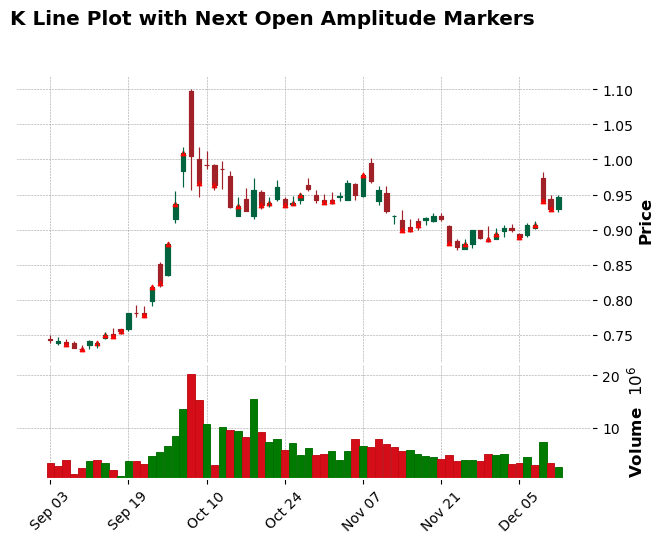

DatetimeIndex(['2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06',
               '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
               '2024-09-13', '2024-09-18', '2024-09-19', '2024-09-20',
               '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26',
               '2024-09-27', '2024-09-30', '2024-10-08', '2024-10-09',
               '2024-10-10', '2024-10-11', '2024-10-14', '2024-10-15',
               '2024-10-16', '2024-10-17', '2024-10-18', '2024-10-21',
               '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08', '2024-11-11', '2024-11-12',
               '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-18',
               '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22',
               '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28',
      

In [129]:




# df.set_index('Date', inplace=True)
# 创建一个新列，仅当 NextOpenAmplitude > 0 时才包含收盘价
df['marker'] = df['close'].where(df['NextOpenAmplitude'] > 0)

# 创建绘图参数
apd = mpf.make_addplot(df['marker'], type='scatter', markersize=10, marker='^', color='r')

# 绘制 K 线图
mpf.plot(df, type='candle', style='charles', addplot=apd, volume=True, title="K Line Plot with Next Open Amplitude Markers")
print(df.index)


开盘幅度大于0的占比是: 0.52
**********************大于0的，上一天*************************


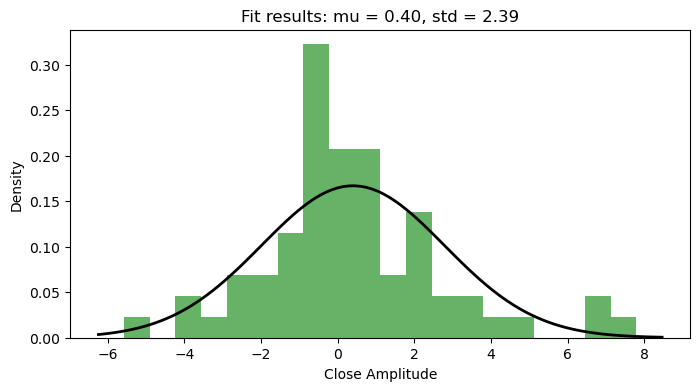

In [46]:
print(f"开盘幅度大于0的占比是: {positive_open_amplitude_ratio:.2f}")
print("**********************大于0的，上一天*************************")
# 将'OpenAmplitude'列向上移动一行
df['NextOpenAmplitude'] = df['OpenAmplitude'].shift(-1)

# 绘制数据的直方图
plt.figure(figsize=(8, 4))
plt.hist(df['CloseAmplitude'], bins=20, density=True, alpha=0.6, color='g')

# 计算均值和标准差
mu = df['CloseAmplitude'].mean()
std = df['CloseAmplitude'].std()

# 生成正态分布数据
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (np.sqrt(2 * np.pi * std**2))) * np.exp(-0.5 * ((x - mu)**2 / std**2))

# 绘制正态分布曲线
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Close Amplitude')
plt.ylabel('Density')

plt.show()

           date   open  close   high    low      vol      Turnover  Amplitude  \
0    2022-03-18  0.672  0.730  0.738  0.672  3999125  2.845635e+08       9.82   
2    2022-03-22  0.717  0.743  0.749  0.716  2240139  1.639272e+08       4.58   
5    2022-03-25  0.763  0.718  0.767  0.710  2362091  1.746215e+08       7.35   
6    2022-03-28  0.730  0.740  0.758  0.714  2452315  1.815770e+08       6.13   
7    2022-03-29  0.755  0.762  0.766  0.750  1839849  1.396319e+08       2.16   
..          ...    ...    ...    ...    ...      ...           ...        ...   
656  2024-12-02  0.887  0.894  0.902  0.886  4787478  4.277114e+08       1.81   
659  2024-12-05  0.894  0.889  0.895  0.887  3216685  2.864199e+08       0.89   
661  2024-12-09  0.902  0.906  0.913  0.901  2776835  2.513695e+08       1.32   
662  2024-12-10  0.974  0.941  0.982  0.941  7231633  6.941177e+08       4.53   
663  2024-12-11  0.944  0.929  0.949  0.926  3272085  3.071229e+08       2.44   

     ChangePercent  ChangeA

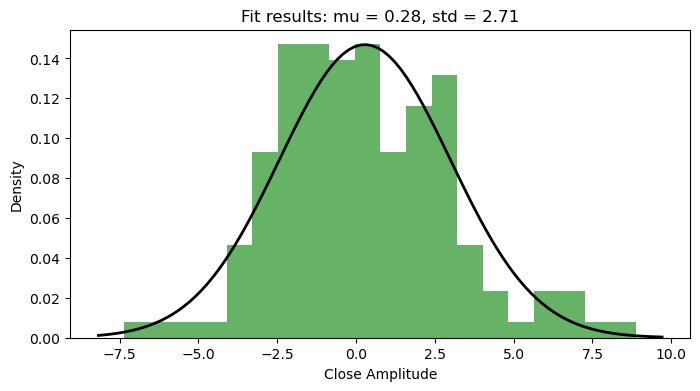

In [ ]:
# 打印高开的前一天的情况
print(df[df['NextOpenAmplitude'] > 0])
total_days = df[df['NextOpenAmplitude'] > 0].shape[0]

aa=df[df['NextOpenAmplitude'] > 1]
down_days = aa[aa['CloseAmplitude'] <0].shape[0]



# 筛选 CloseAmplitude < 0 的数据
# negative_close = aa[aa['CloseAmplitude'] < 0]
negative_close = aa
# 绘制数据的直方图
plt.figure(figsize=(8, 4))
plt.hist(negative_close['CloseAmplitude'], bins=20, density=True, alpha=0.6, color='g')

# 计算均值和标准差
mu = negative_close['CloseAmplitude'].mean()
std = negative_close['CloseAmplitude'].std()

# 生成正态分布数据
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (np.sqrt(2 * np.pi * std**2))) * np.exp(-0.5 * ((x - mu)**2 / std**2))

# 绘制正态分布曲线
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Close Amplitude')
plt.ylabel('Density')

plt.show()
